In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
import pandas as pd

# Load the datasets
train_path = "C:/Users/Ibrahim Yousaf/OneDrive/Desktop/Titanic_Surivival_Predictor/train.csv"
test_path = "C:/Users/Ibrahim Yousaf/OneDrive/Desktop/Titanic_Surivival_Predictor/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [10]:
test_df.shape

(418, 11)

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Visualization

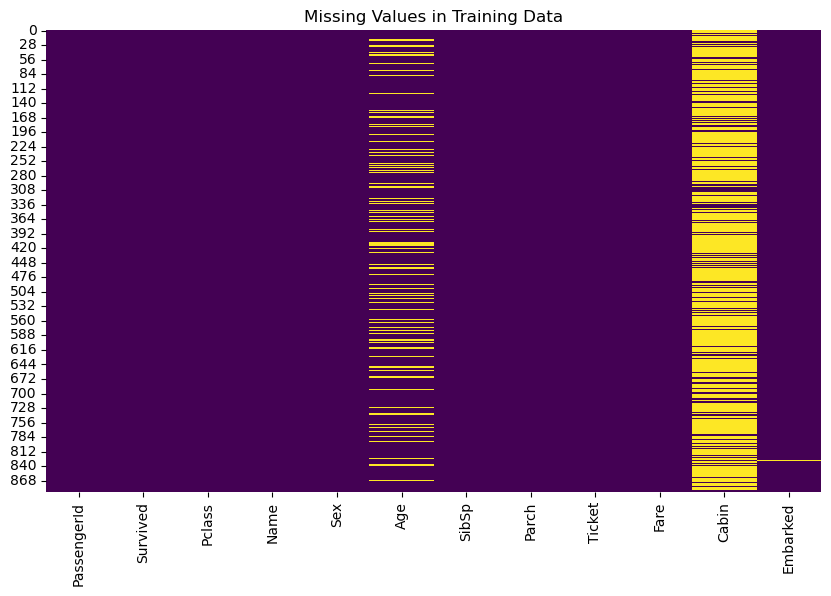

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

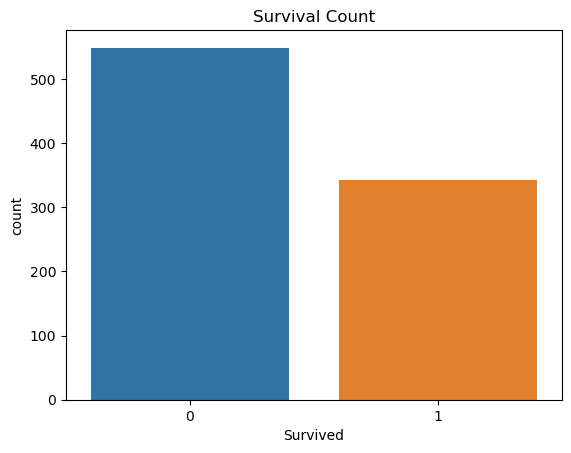

Survival counts:
 0    549
1    342
Name: Survived, dtype: int64


In [13]:
# Distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

print("Survival counts:\n", train_df['Survived'].value_counts())

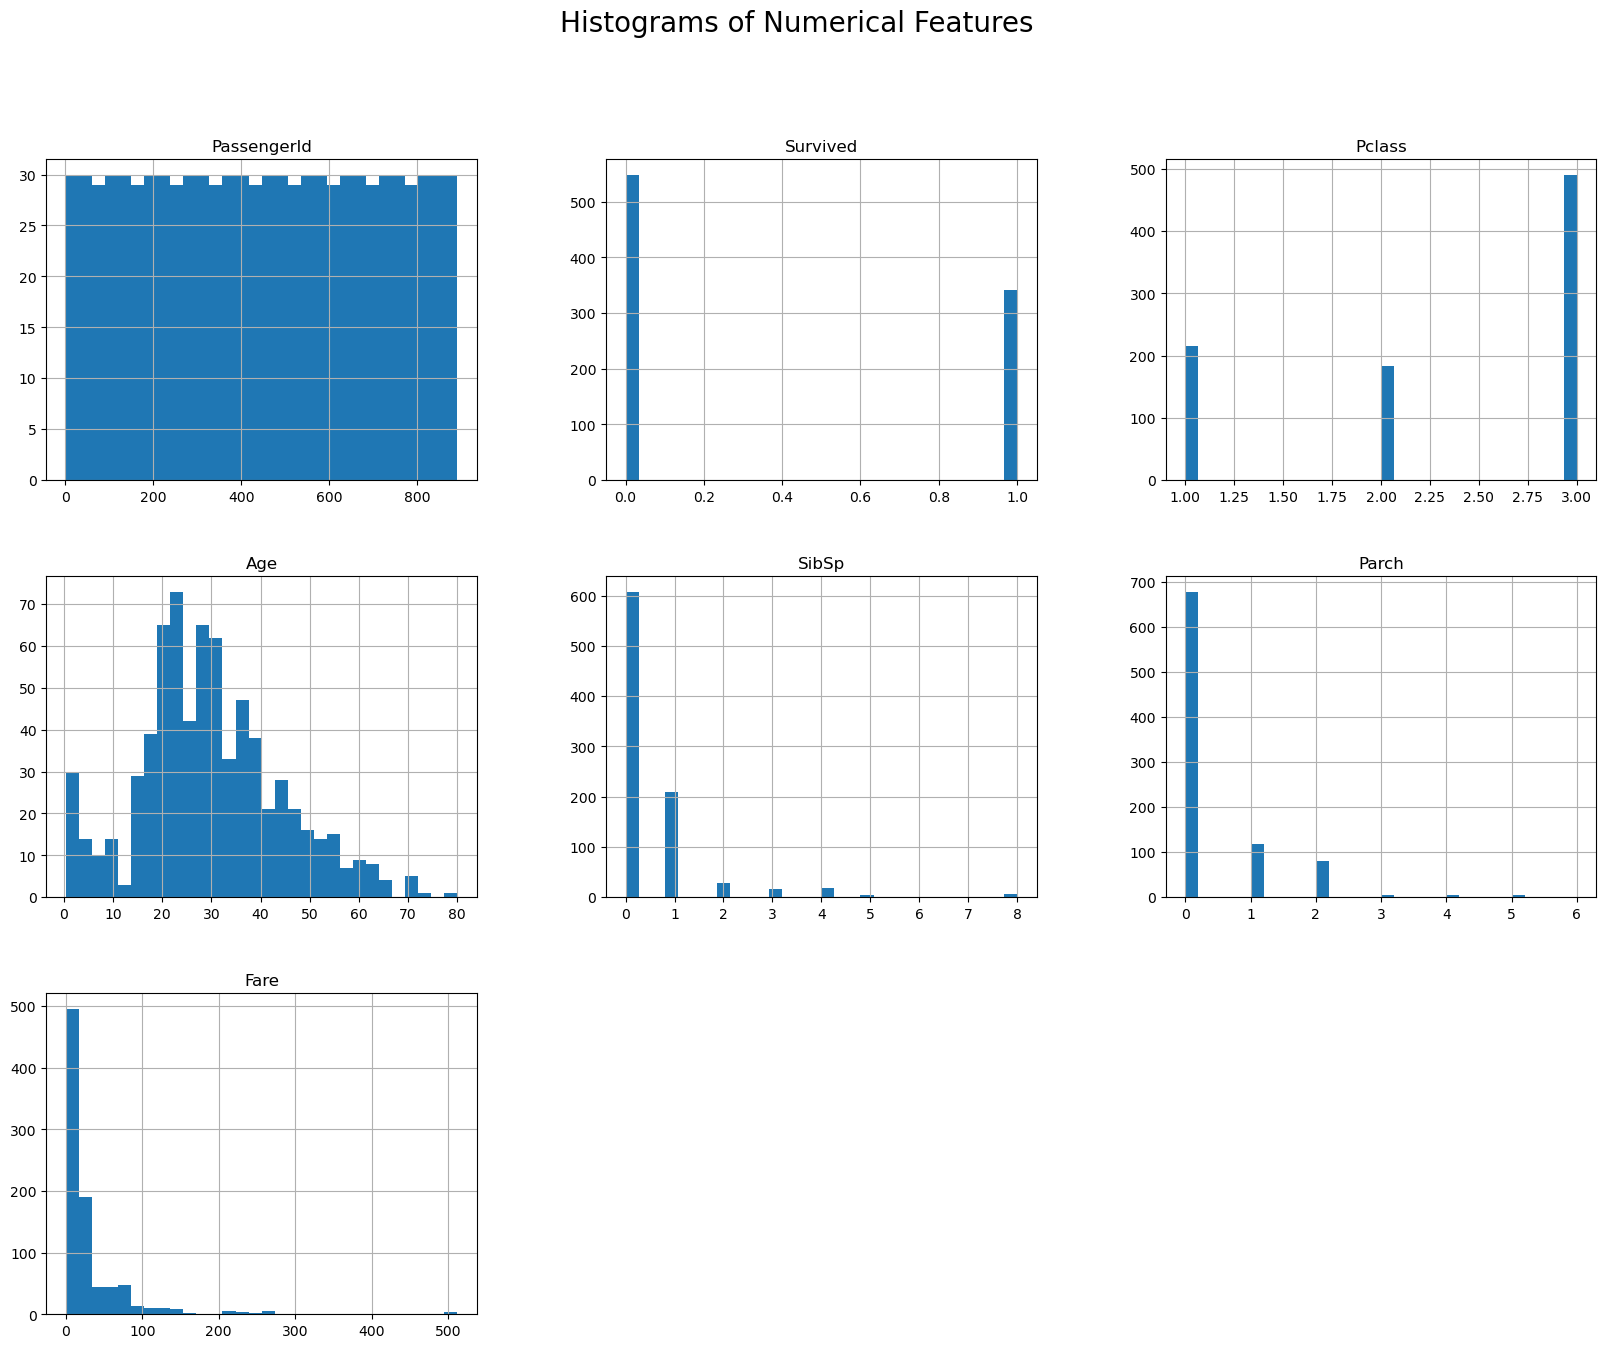

In [14]:
# Distribution of numerical features
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', size=20)
plt.show()

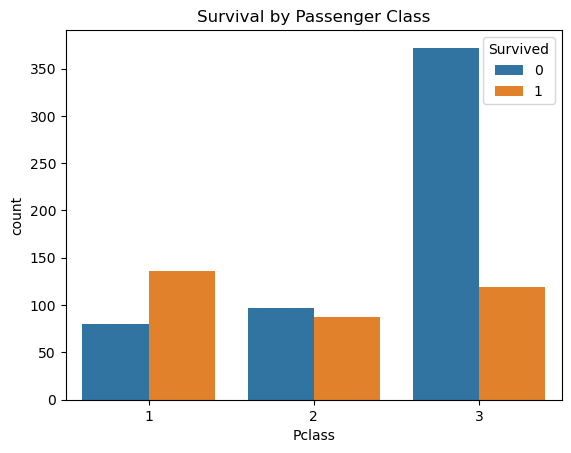

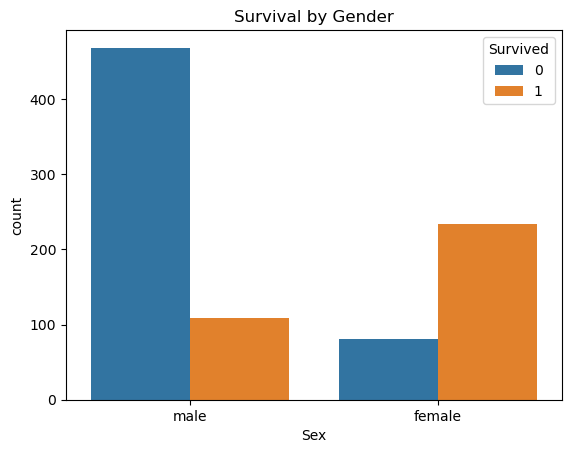

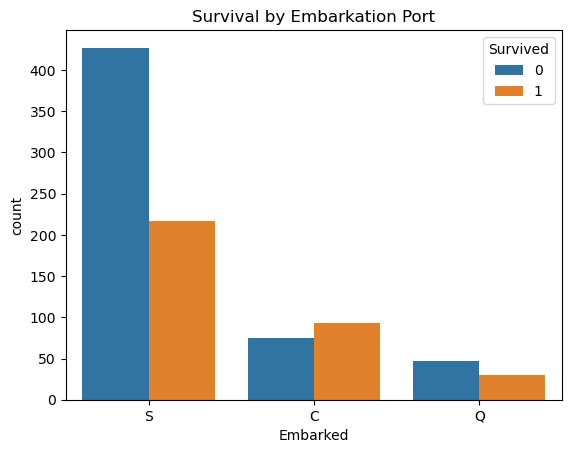

In [15]:
# Analyze 'Pclass' feature
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

# Analyze 'Sex' feature
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()

# Analyze 'Embarked' feature
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival by Embarkation Port')
plt.show()


# Data Preprocessing

## Fill missing values

In [16]:
def fill_missing_values(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    return df

train_df = fill_missing_values(train_df)
test_df = fill_missing_values(test_df)

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Drop unnecessary columns

In [19]:
def drop_unnecessary_columns(df):
    df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
    return df

train_df = drop_unnecessary_columns(train_df)
test_df = drop_unnecessary_columns(test_df)

In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Convert textual features to numerical values

In [22]:
def convert_categorical(df):
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

train_df = convert_categorical(train_df)
test_df = convert_categorical(test_df)

In [23]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# Splitting data

In [25]:
# Split the data into features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_df = scaler.transform(test_df)

# Model Training and Evaluation

## Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_val, y_pred_logreg))

Logistic Regression Accuracy: 0.8100558659217877

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Decision Tree

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print("\nDecision Tree Classification Report:\n", classification_report(y_val, y_pred_tree))

Decision Tree Accuracy: 0.7932960893854749

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



## Random forest 

In [29]:
forest = RandomForestClassifier(n_estimators=15)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_forest))
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_forest))

Random Forest Accuracy: 0.7932960893854749

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



## Gradient Boosting

In [30]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_val)
gboost_accuracy = accuracy_score(y_val, y_pred_gboost)
print("Gradient Boosting Accuracy:", gboost_accuracy)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred_gboost))

Gradient Boosting Accuracy: 0.8044692737430168
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



## Support Vector Machine

In [31]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))

SVM Accuracy: 0.8212290502793296
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Random Forest with Grid Search (Hyperparameter Tuning)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_val)

# Evaluate the model
best_rf_accuracy = accuracy_score(y_val, y_pred_best_rf)
print("Random Forest with Best Parameters Accuracy:", best_rf_accuracy)
print("Random Forest with Best Parameters Classification Report:")
print(classification_report(y_val, y_pred_best_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8314291342460358
Random Forest with Best Parameters Accuracy: 0.8156424581005587
Random Forest with Best Parameters Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

